<a href="https://colab.research.google.com/github/durgesh510/mtaie19/blob/master/ML2_Assign1_MT19AIE235.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Roll - MT19AIE235

In [8]:
#loading the dataset
import numpy as np
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   
from keras.utils import np_utils
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [2]:
#Preparing the dataset and preprocessing
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalizing of pixel values (0-1 range)
X_train /= 255
X_test /= 255

170500096/170498071 [==============================] - 2s 0us/step


In [62]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 10)
Shape of test data:
(10000, 32, 32, 3)
(10000, 10)


In [61]:
#creating CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)             

In [63]:
#Training the model
myCNN = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Epoch 1/15
1250/1250 - 6s - loss: 1.6103 - accuracy: 0.4132 - val_loss: 1.3705 - val_accuracy: 0.5144
Epoch 2/15
1250/1250 - 5s - loss: 1.1166 - accuracy: 0.6070 - val_loss: 1.0521 - val_accuracy: 0.6345
Epoch 3/15
1250/1250 - 6s - loss: 0.8663 - accuracy: 0.6974 - val_loss: 0.8974 - val_accuracy: 0.6942
Epoch 4/15
1250/1250 - 5s - loss: 0.6849 - accuracy: 0.7610 - val_loss: 0.9499 - val_accuracy: 0.6802
Epoch 5/15
1250/1250 - 5s - loss: 0.5215 - accuracy: 0.8183 - val_loss: 0.9055 - val_accuracy: 0.7122
Epoch 6/15
1250/1250 - 5s - loss: 0.3807 - accuracy: 0.8683 - val_loss: 0.9637 - val_accuracy: 0.7069
Epoch 7/15
1250/1250 - 5s - loss: 0.2730 - accuracy: 0.9057 - val_loss: 1.3396 - val_accuracy: 0.6778
Epoch 8/15
1250/1250 - 5s - loss: 0.2119 - accuracy: 0.9269 - val_loss: 1.2719 - val_accuracy: 0.6930
Epoch 9/15
1250/1250 - 5s - loss: 0.1699 - accuracy: 0.9414 - val_loss: 1.3833 - val_accuracy: 0.6946
Epoch 10/15
1250/1250 - 5s - loss: 0.1414 - accuracy: 0.9513 - val_loss: 1.4835 - 

In [37]:
#Plotting the training losses
import matplotlib.pyplot as plt
def plotLosses(myCNN):  
    plt.plot(myCNN.history['loss'])
    plt.plot(myCNN.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

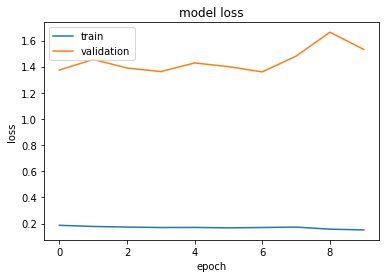

In [38]:
#plotting the training losses 
plotLosses(myCNN)

In [39]:
#Evaluating the model
eval = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [40]:
print(model.metrics_names)
print(eval)

['loss', 'accuracy']
[1.6132804155349731, 0.7243000268936157]


This shows that overfitting occured during the trainig of the model. To avoid this, two of the popular regularization techniques will be used.

**Regularization**


**1. Dropout**


In [26]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


In [51]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# adding Dropout layer
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# adding Dropout layer
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# adding Dropout layer
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
# adding Dropout layer
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 4, 4, 128)        

In [52]:
#Training the model which contains drouput layers
myCNN = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Epoch 1/15
1250/1250 - 4s - loss: 1.9091 - accuracy: 0.2853 - val_loss: 1.6362 - val_accuracy: 0.4151
Epoch 2/15
1250/1250 - 4s - loss: 1.5593 - accuracy: 0.4289 - val_loss: 1.4630 - val_accuracy: 0.4788
Epoch 3/15
1250/1250 - 4s - loss: 1.4275 - accuracy: 0.4843 - val_loss: 1.3347 - val_accuracy: 0.5267
Epoch 4/15
1250/1250 - 4s - loss: 1.3528 - accuracy: 0.5149 - val_loss: 1.2205 - val_accuracy: 0.5752
Epoch 5/15
1250/1250 - 4s - loss: 1.2965 - accuracy: 0.5391 - val_loss: 1.3207 - val_accuracy: 0.5293
Epoch 6/15
1250/1250 - 4s - loss: 1.2520 - accuracy: 0.5547 - val_loss: 1.1566 - val_accuracy: 0.5937
Epoch 7/15
1250/1250 - 4s - loss: 1.2192 - accuracy: 0.5675 - val_loss: 1.0982 - val_accuracy: 0.6053
Epoch 8/15
1250/1250 - 4s - loss: 1.2003 - accuracy: 0.5755 - val_loss: 1.1238 - val_accuracy: 0.6018
Epoch 9/15
1250/1250 - 4s - loss: 1.1782 - accuracy: 0.5834 - val_loss: 1.0796 - val_accuracy: 0.6233
Epoch 10/15
1250/1250 - 4s - loss: 1.1644 - accuracy: 0.5921 - val_loss: 1.0033 - 

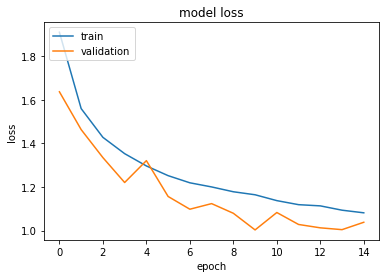

In [53]:
#plotting the training losses 
plotLosses(myCNN)

In [54]:
#Evaluating the model
eval = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [55]:
print(model.metrics_names)
print(eval)

['loss', 'accuracy']
[1.0639084577560425, 0.6359000205993652]


**2. Batch Normalization**

In [46]:
#loading libraries
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [56]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))

# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
dropout_10 (Dropout)         (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 64)       

In [57]:
#Training the model which contains Batch normalization
myCNN = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Epoch 1/15
1250/1250 - 7s - loss: 1.7482 - accuracy: 0.3822 - val_loss: 1.8136 - val_accuracy: 0.3249
Epoch 2/15
1250/1250 - 7s - loss: 1.4179 - accuracy: 0.4921 - val_loss: 1.5231 - val_accuracy: 0.4812
Epoch 3/15
1250/1250 - 7s - loss: 1.2070 - accuracy: 0.5728 - val_loss: 1.4907 - val_accuracy: 0.4924
Epoch 4/15
1250/1250 - 7s - loss: 1.1053 - accuracy: 0.6124 - val_loss: 1.5084 - val_accuracy: 0.4998
Epoch 5/15
1250/1250 - 7s - loss: 1.0221 - accuracy: 0.6431 - val_loss: 1.2809 - val_accuracy: 0.5586
Epoch 6/15
1250/1250 - 7s - loss: 0.9615 - accuracy: 0.6658 - val_loss: 1.1825 - val_accuracy: 0.6236
Epoch 7/15
1250/1250 - 7s - loss: 0.9119 - accuracy: 0.6845 - val_loss: 1.1092 - val_accuracy: 0.6349
Epoch 8/15
1250/1250 - 7s - loss: 0.8725 - accuracy: 0.6952 - val_loss: 0.9872 - val_accuracy: 0.6833
Epoch 9/15
1250/1250 - 7s - loss: 0.8480 - accuracy: 0.7036 - val_loss: 1.0438 - val_accuracy: 0.6450
Epoch 10/15
1250/1250 - 7s - loss: 0.8055 - accuracy: 0.7185 - val_loss: 0.9273 - 

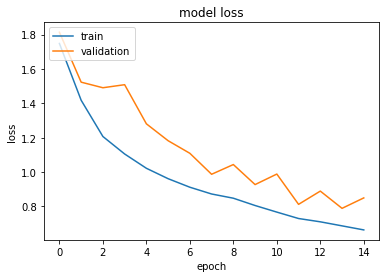

In [58]:
#plotting the training losses 
plotLosses(myCNN)

In [59]:
#Evaluating the model
eval = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [60]:
print(model.metrics_names)
print(eval)

['loss', 'accuracy']
[0.8556241989135742, 0.7038000226020813]
